In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
### import data

df = pd.read_csv('Data/Buro_clustering_data.csv')
df.shape

(39193, 83)

In [3]:
import os

# Get current working directory
current_dir = os.getcwd()

print("Current directory:", current_dir)

# Output_folder='Outputs_Buro_cluster_by_Gaussian'
Output_folder='Outputs_Buro_cluster_by_Gaussian_7segments'


Current directory: C:\Users\mohabu\iHelm\Buro_Clustering


In [4]:
## Create the output folder
folder_path = r''+Output_folder
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

### Postprocessing data

In [5]:
df = df.set_index('date')

In [6]:
df['date']=df.index
df

,RT_id,time_xPorts,eff_score,latitude,longitude,accelPedalPos,headingMagnetic,courseOverGroundTrue,speedOverGround,pitch,...,pressure,legId,acceleration,engineTripFuel,engineTotalFuelUsed,fuelPerStepEngineTotal,deltaTimestamp,engineOn,segmentId,date
date,,,,,,,,,,,,,,,,,,,,,
2020-01-16 13:10:00,248,1,0.702661,57.711047,11.659483,29.336750,239.203157,3653.452891,1.738404,0.014409,...,101910.150,1.0,0.024496,69057.78250,69057.78250,0.0025,0.3,1.0,2.000,2020-01-16 13:10:00
2020-01-16 13:11:00,248,2,0.702661,57.711401,11.660977,61.683917,130.172187,4743.088892,2.088625,0.031427,...,101907.175,1.0,0.038328,69058.11500,69058.17375,0.0025,0.3,1.0,6.875,2020-01-16 13:11:00
2020-01-16 13:12:00,248,3,0.702661,57.712142,11.664302,64.696250,66.558752,3646.586843,4.688200,0.020384,...,101906.725,1.0,0.003128,69058.69875,69058.74000,0.0025,0.3,1.0,8.975,2020-01-16 13:12:00
2020-01-16 13:13:00,248,4,0.702661,57.713221,11.668567,64.650250,70.919434,3830.231133,4.658400,0.020279,...,101907.350,1.0,0.000082,69059.19875,69059.25750,0.0025,0.3,1.0,18.490,2020-01-16 13:13:00
2020-01-16 13:14:00,248,5,0.702661,57.714124,11.672979,64.538967,74.650272,4089.626122,4.734000,0.019694,...,101910.150,1.0,0.001667,69059.69875,69059.77375,0.0025,0.3,1.0,25.890,2020-01-16 13:14:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-12 14:47:00,1718,9,0.982430,57.709019,11.669584,7.017333,300.937273,17633.170827,2.871100,0.012976,...,99015.650,1105.0,-0.009589,151400.00000,151400.00000,0.0000,0.3,1.0,11621.425,2021-03-12 14:47:00
2021-03-12 14:48:00,1718,10,0.982430,57.709871,11.667433,13.292333,301.063825,17549.236855,2.595100,0.014134,...,99027.175,1105.0,0.007580,151400.18625,151400.20250,0.0025,0.3,1.0,11625.255,2021-03-12 14:48:00
2021-03-12 14:49:00,1718,11,0.982430,57.710742,11.664951,27.517333,291.028698,16998.131635,3.269400,0.015404,...,99031.275,1105.0,0.003805,151400.50000,151400.50000,0.0000,0.3,1.0,11626.115,2021-03-12 14:49:00


#### Modify Course and wind direction measurments

In [7]:
df['courseOverGroundTrue']= df.courseOverGroundTrue/180*np.pi
df['windDirectionTrue']= df.windDirectionTrue*180/np.pi

df[['courseOverGroundTrue','windDirectionTrue']].describe()

,courseOverGroundTrue,windDirectionTrue
count,39193.000000,39193.000000
mean,190.147295,199.690355
std,88.759529,82.247682
min,0.671456,7.315582
25%,123.494808,147.808630
50%,178.248263,209.030760
75%,251.380119,267.473186
max,359.205347,352.170428


In [8]:
dforig=df
dforig1=df

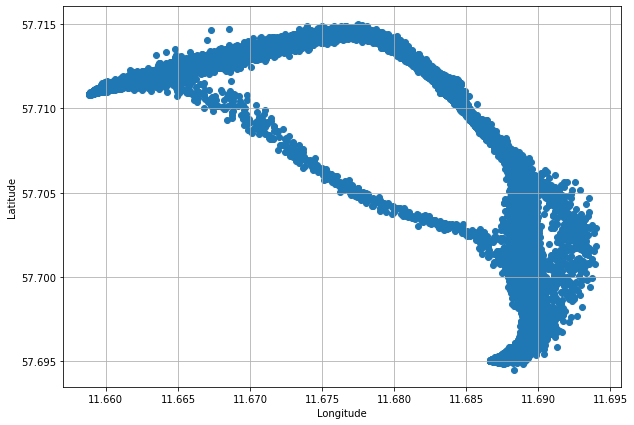

In [9]:
# Create a scatter plot of latitude and longitude to visualize the ferry's path
fig = plt.figure(figsize=(10,7))
plt.scatter(dforig['longitude'], dforig['latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.savefig(Output_folder+'/Scatter_dforig_lat_lon_Non-Direct_Direct_paths.png', dpi=500)  

plt.show()

In [10]:
# st=stop

### Data Processing for Three Path Classes

In [11]:
df_dest21=pd.DataFrame([])
df_dest21=df[df.Direct_RT==1]
df_dest21['direction'] = 'Direct'

# Group the rows by RT_id and check if any group has direction == 'Direct'
direct_groups = df_dest21.groupby('RT_id')['direction'].transform(lambda x: 'Direct' in x.values)
# Replace direction values in groups where east_canal_groups is True
df_dest21.loc[direct_groups, 'direction'] = 'Direct'


df_dest52=pd.DataFrame([])
df_dest5=df

df_dest51=df_dest5[(df_dest5.latitude<57.705) & (df_dest5.latitude>57.700)]
df_dest52=df_dest51[(df_dest51.longitude>11.6875)]

df_dest52['direction'] = df_dest52['longitude'].apply(lambda x: 'West_Canal' if x <11.6905 else 'East_Canal')

# Group the rows by RT_id and check if any group has direction == 'East_Canal'
east_canal_groups = df_dest52.groupby('RT_id')['direction'].transform(lambda x: 'East_Canal' in x.values)

# Replace direction values in groups where east_canal_groups is True
df_dest52.loc[east_canal_groups, 'direction'] = 'East_Canal'


df=pd.concat([df_dest21, df_dest52], axis=0)

df.shape

(4693, 84)

In [12]:
df.RT_id.unique()
df.Direct_RT.unique()
df.Gr_Ock_fg.unique()
df.Direct_RT.value_counts()
df.Gr_Ock_fg.value_counts()
df.RT_id.unique()
pd.Series(df.RT_id.unique()).sort_values().values   

array([   0,    1,    2, ..., 1751, 1752, 1753], dtype=int64)

In [13]:
df.direction.unique()
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

4693


West_Canal    3502
Direct         912
East_Canal     279
Name: direction, dtype: int64

In [14]:
# group the "df" DataFrame by "RT_id" and get the most frequent value of "direction" for each group
directions = df.groupby('RT_id')['direction'].agg(lambda x: x.value_counts().index[0]).reset_index()

# merge the "directions" DataFrame with the "dforig" DataFrame based on the "RT_id" column
df_new = pd.merge(dforig, directions, on='RT_id', how='left')

# fill NaN values in the "direction" column with a default value (e.g. "Unknown")
df_new['direction'] = df_new['direction'].fillna('Unknown')


df_new.shape

(39193, 84)

In [15]:
df=df_new
df.index=dforig.index
df.direction.unique()
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

39193


West_Canal    35406
East_Canal     2832
Direct          912
Unknown          43
Name: direction, dtype: int64

In [16]:
df['direction'].replace('Unknown', 'West_Canal', inplace=True)
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

39193


West_Canal    35449
East_Canal     2832
Direct          912
Name: direction, dtype: int64

In [17]:
dforig1=df; dforig2=df; dforig3=df

In [18]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind

In [19]:
df = df[['latitude', 'longitude', 'speedOverGround', 'courseOverGroundTrue',
              'distanceFromDock', 'distanceToNextDock', 'distanceToPreviousDock', 
              'accumDistLeg', 'accumFuelLeg', 'accumTimeLeg', 'EngineFuelRate',
              'windSpeedOverGround', 'windDirectionTrue',  'windSpeed','windDirection', 
              'waveheight', 'wavedirect','currentSpeed', 'currentDirection',
              'windSpeed_sg', 'windDirection_sg', 'Temp_2m', 'Temp_surf',
       'Snow_depth', 'Snow_fall', 'Press_surf', 'Precip',
         'iceCover', 'swellHeight', 'secondarySwellHeight','waterTemperature',
         'direction']]


df['pathSelection']=df.direction

In [20]:
df.shape

(39193, 33)

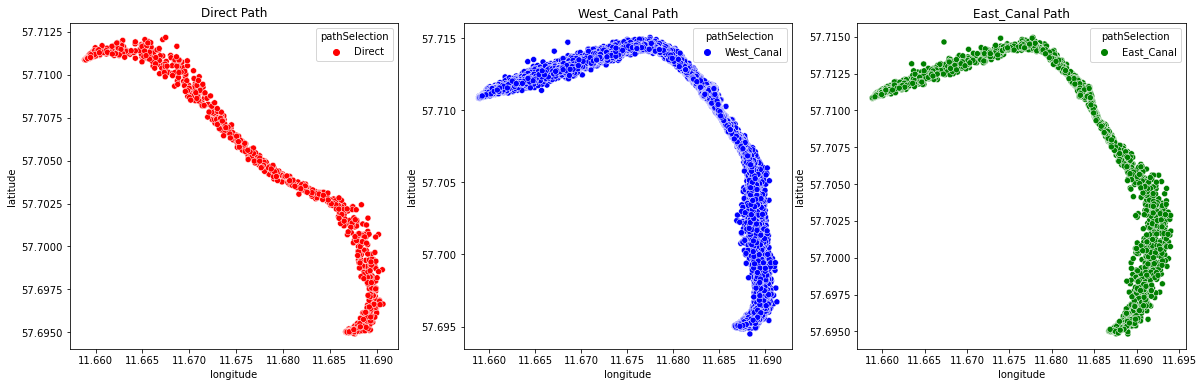

In [21]:
import seaborn as sns

# Visualize the distribution of latitude and longitude for both paths
import matplotlib.ticker as ticker
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.scatterplot(x='longitude', y='latitude', hue='pathSelection', data=df[df['pathSelection']=='Direct'], ax=axes[0],  palette=['red'])
sns.scatterplot(x='longitude', y='latitude', hue='pathSelection', data=df[df['pathSelection']=='West_Canal'], ax=axes[1],  palette=['blue'])
sns.scatterplot(x='longitude', y='latitude', hue='pathSelection', data=df[df['pathSelection']=='East_Canal'], ax=axes[2],  palette=['green'])

# Set number format for axis ticks
for ax in axes:
    ax.ticklabel_format(useOffset=False, style='plain')


axes[0].set_title('Direct Path')
axes[1].set_title('West_Canal Path')
axes[2].set_title('East_Canal Path')

axes[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))


plt.savefig(Output_folder+'/ScatterPlot_Non-Direct_Direct_paths_features.png', dpi=500)  

plt.show()

In [22]:
df.direction.unique()

array(['West_Canal', 'East_Canal', 'Direct'], dtype=object)

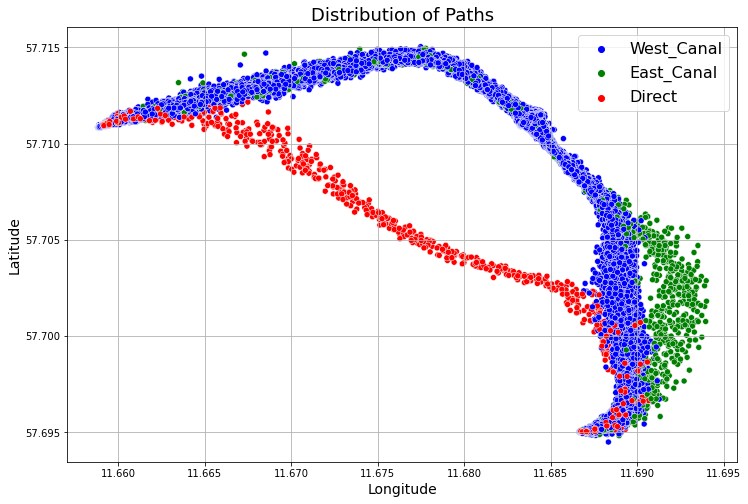

In [23]:
import seaborn as sns
import matplotlib.ticker as ticker

# Visualize the distribution of latitude and longitude for all path classes in a single plot
fig, ax = plt.subplots(figsize=(12, 8))

# Use the 'hue' parameter to specify the path selection class
sns.scatterplot(x='longitude', y='latitude', hue='pathSelection', 
                data=df, legend='full', palette=[ 'blue', 'green', 'red'])

# Set number format for axis ticks
ax.ticklabel_format(useOffset=False, style='plain')

# Set title
ax.set_title('Distribution of Paths', fontsize=18)

# Set x-axis format
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

# Set legend outside the plot with increased font size
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=16)
plt.legend(fontsize=16)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.grid()

plt.savefig(Output_folder+'/ScatterPlot_Colorful_paths.png', dpi=500)  

plt.show()

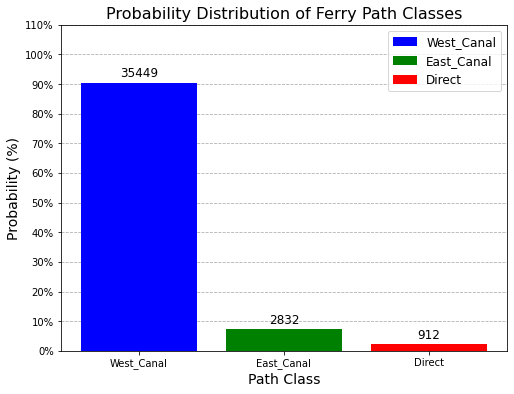

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the probability distribution of each path class
prob_dist = df['direction'].value_counts(normalize=True)
counts = df['direction'].value_counts()

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Path Class', fontsize=14)
ax.set_ylabel('Probability (%)', fontsize=14)

# Set the colors and labels for each path class
colors = [ 'blue', 'green', 'red']
labels = ['West_Canal', 'East_Canal', 'Direct']

# Plot the probability distribution for each path class
for i in range(len(labels)):
    ax.bar(labels[i], prob_dist[labels[i]], color=colors[i], label=labels[i], zorder=3)
    ax.text(labels[i], prob_dist[labels[i]]+0.02, str(counts[labels[i]]), ha='center', fontsize=12)

# Set the y-axis labels as percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


# Set the y-axis labels as percentages
ax.yaxis.set_ticks(np.arange(0, max(prob_dist.values)*1+.2, 0.1))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])

# Set the title and legend
ax.set_title('Probability Distribution of Ferry Path Classes', fontsize=16)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', zorder=0)

plt.savefig(Output_folder+'/Barplot_Prob_ferry_paths.png', dpi=500)  

plt.show()


In [25]:
# st=stop

### Single Gaussian Distributions for Several Segments

In [26]:
df=dforig2
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

39193


West_Canal    35449
East_Canal     2832
Direct          912
Name: direction, dtype: int64

In [27]:
df=dforig2
df['Path_class']=df.direction.copy()

print(df.shape)
df.direction.unique()

(39193, 85)


array(['West_Canal', 'East_Canal', 'Direct'], dtype=object)

#### Data Processing for 7 Path Segments

In [28]:

df_dest21=pd.DataFrame([])
#     df_dest21=df[(df.latitude>57.712) & (df.longitude<11.68) & (df.Direct_RT!=1)]
df_dest21=df[(df.latitude>57.711) & (df.longitude<11.68) & (df.longitude>11.665)]

df_dest21['direction'] = 'North-East'

df_dest61=pd.DataFrame([])
df_dest61=df[(df.latitude>=57.710) & (df.longitude<=11.665)]

df_dest61['direction'] = 'North-West'

df_dest31=pd.DataFrame([])
df_dest31=df[(df.latitude>=57.705)  & (df.longitude>=11.68)]
df_dest31['direction'] = 'Canal'

df_dest41=pd.DataFrame([])
#     df_dest41=df[(df.latitude<=57.700) & (df.Direct_RT!=1)]
df_dest41=df[(df.latitude<=57.700)]

df_dest41['direction'] = 'South'

df_dest51=pd.DataFrame([])

#     df_dest51=df[(df.latitude<57.705) & (df.latitude>57.700) & (df.longitude>11.686) & (df.Direct_RT!=1)]
df_dest51=df[(df.latitude<57.705) & (df.latitude>57.700) & (df.longitude>11.686)]
#     df_dest52=df_dest51[(df.longitude>11.686)]

df_dest51['direction'] = df_dest51['longitude'].apply(lambda x: 'South-West' if x <11.6905 else 'South-East')

# Group the rows by RT_id and check if any group has direction == 'East_Canal'
east_canal_groups = df_dest51.groupby('RT_id')['direction'].transform(lambda x: 'South-East' in x.values)

# Replace direction values in groups where east_canal_groups is True
df_dest51.loc[east_canal_groups, 'direction'] = 'South-East'

df_dest11=pd.DataFrame([])
df_dest11=df[(df.Direct_RT==1)]

df_dest11['direction'] = 'Shortcut'

# drop rows that exist in other segements
df_dest11 = df_dest11[~((df_dest11.index.isin(df_dest51.index)) | 
                        (df_dest11.index.isin(df_dest41.index)) | 
                        (df_dest11.index.isin(df_dest21.index)) |
                        (df_dest11.index.isin(df_dest61.index)))]

df=pd.concat([df_dest11, df_dest21, df_dest31, df_dest41, df_dest51, df_dest61], axis=0)

df.shape

(39193, 85)

In [29]:
df.RT_id.unique()
df.Direct_RT.unique()
df.Gr_Ock_fg.unique()
df.Direct_RT.value_counts()
df.Gr_Ock_fg.value_counts()
df.RT_id.unique()
pd.Series(df.RT_id.unique()).sort_values().values   

array([   0,    1,    2, ..., 1752, 1753, 1754], dtype=int64)

In [30]:
df.direction.unique()
print(df['direction'].value_counts().sum())
df['direction'].value_counts()

39193


Canal         17742
North-East     6525
South          5781
North-West     4934
South-West     3548
Shortcut        384
South-East      279
Name: direction, dtype: int64

In [31]:
#### Check the path classes in segments

# print(df['direction'].value_counts().sum())
# df['direction'].value_counts()
df[df.direction=='South']['Path_class'].unique()

array(['West_Canal', 'East_Canal', 'Direct'], dtype=object)

In [32]:
# st=stop

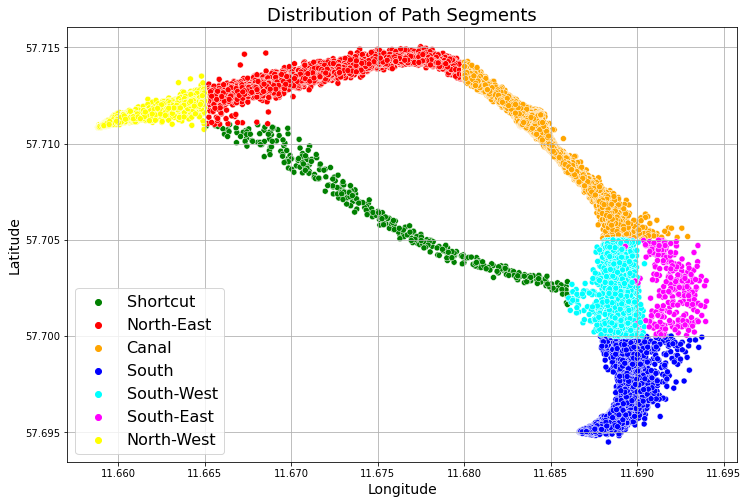

In [33]:
import seaborn as sns
import matplotlib.ticker as ticker

# Visualize the distribution of latitude and longitude for all path classes in a single plot
fig, ax = plt.subplots(figsize=(12, 8))

# Use the 'hue' parameter to specify the path selection class
sns.scatterplot(x='longitude', y='latitude', hue='direction', 
                data=df, legend='full', palette=['green', 'red', 'orange', 'blue', 'cyan', 'magenta','yellow'])

# Set number format for axis ticks
ax.ticklabel_format(useOffset=False, style='plain')

# Set title
ax.set_title('Distribution of Path Segments', fontsize=18)

# Set x-axis format
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

# Set legend outside the plot with increased font size
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=16)
plt.legend(fontsize=16)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.grid()

plt.savefig(Output_folder+'/ScatterPlot_Seven_Segments.png', dpi=500)  

plt.show()

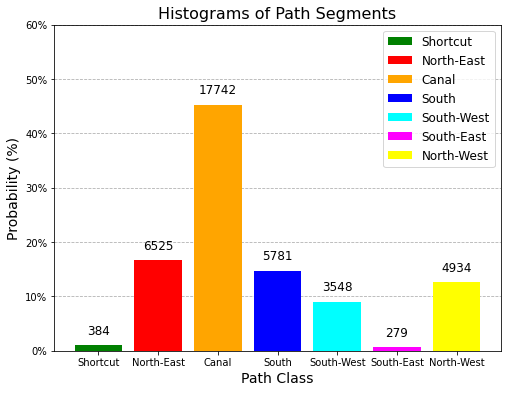

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the probability distribution of each path class
prob_dist = df['direction'].value_counts(normalize=True)
counts = df['direction'].value_counts()

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Path Class', fontsize=14)
ax.set_ylabel('Probability (%)', fontsize=14)

# Set the colors and labels for each path class
colors = [ 'green', 'red', 'orange', 'blue', 'cyan', 'magenta','yellow']
labels = ['Shortcut', 'North-East', 'Canal', 'South', 'South-West','South-East', 'North-West']

# Plot the probability distribution for each path class
for i in range(len(labels)):
    ax.bar(labels[i], prob_dist[labels[i]], color=colors[i], label=labels[i], zorder=3)
    ax.text(labels[i], prob_dist[labels[i]]+0.02, str(counts[labels[i]]), ha='center', fontsize=12)

# Set the y-axis labels as percentages
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


# Set the y-axis labels as percentages
ax.yaxis.set_ticks(np.arange(0, max(prob_dist.values)*1+.2, 0.1))
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])

# Set the title and legend
ax.set_title('Histograms of Path Segments', fontsize=16)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', zorder=0)

plt.savefig(Output_folder+'/Barplot_Hist_Path_Segs.png', dpi=500)  

plt.show()


In [35]:
# dforig[(dforig.RT_id==1308) & (dforig.Direct_RT==0)].longitude
df.direction.unique()

array(['Shortcut', 'North-East', 'Canal', 'South', 'South-West',
       'South-East', 'North-West'], dtype=object)

In [36]:
df['Path_class'].unique()

array(['Direct', 'West_Canal', 'East_Canal'], dtype=object)

#### Statistics on Segements

In [37]:
df['segment']=df.direction
# df[['latitude','longitude', 'segment', 'Path_class']]

In [38]:
# create an empty DataFrame to store the results
result_seg_df = pd.DataFrame(columns=['segment', 'latitude_mean', 'latitude_std', 'longitude_mean', 'longitude_std'])

# group the DataFrame by 'segment' and 'Path_class'
grouped_df = df.groupby(['segment'])

# compute the mean and standard deviation for each group
mean_std_df = grouped_df[['latitude', 'longitude']].agg(['mean', 'std']).round(4)

# flatten the column names
mean_std_df.columns = ['_'.join(col).strip() for col in mean_std_df.columns.values]

# reset the index to make 'segment' and 'Path_class' columns regular columns
mean_std_df = mean_std_df.reset_index()

# append the resulting DataFrame to the existing DataFrame
result_seg_df = pd.concat([result_seg_df, mean_std_df], axis=0, ignore_index=True)

# display the resulting DataFrame
Seg_stats_gauss=result_seg_df
Seg_stats_gauss


,segment,latitude_mean,latitude_std,longitude_mean,longitude_std
0,Canal,57.7105,0.0019,11.6844,0.0020
1,North-East,57.7137,0.0007,11.6728,0.0044
2,North-West,57.7114,0.0004,11.6610,0.0018
3,Shortcut,57.7063,0.0027,11.6757,0.0055
4,South,57.6968,0.0016,11.6888,0.0011
5,South-East,57.7026,0.0015,11.6920,0.0010
6,South-West,57.7025,0.0015,11.6889,0.0005


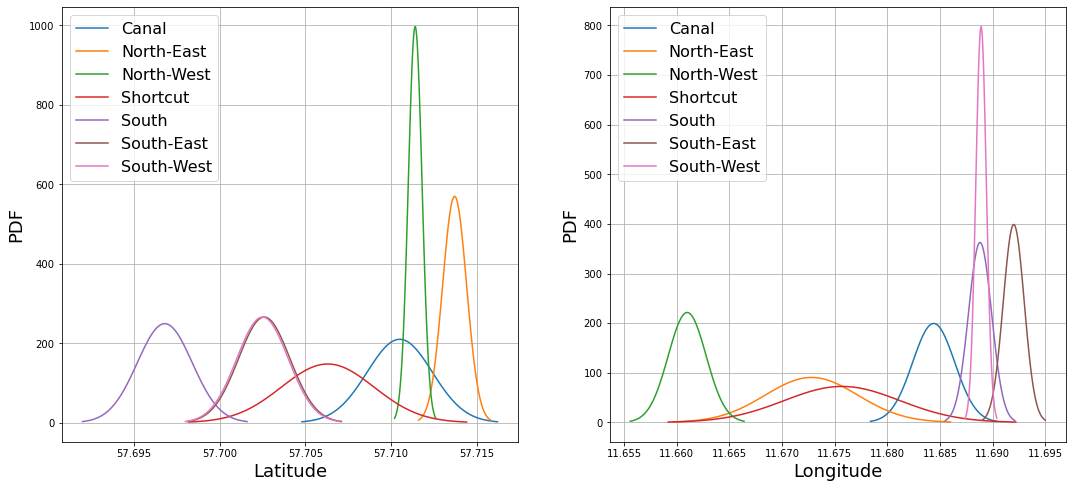

In [39]:
from scipy.stats import norm

# Define the figure and subplot layout
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot the PDFs for latitude and longitude for each segment
for i, row in Seg_stats_gauss.iterrows():
    # Define the x-axis range for the PDF plot
    x_min = row['latitude_mean'] - 3 * row['latitude_std']
    x_max = row['latitude_mean'] + 3 * row['latitude_std']
    x = np.linspace(x_min, x_max, 100)
    
    # Calculate the PDF for latitude
    pdf_lat = norm.pdf(x, loc=row['latitude_mean'], scale=row['latitude_std'])
    
    # Plot the PDF for latitude
    axs[0].plot(x, pdf_lat, label=row['segment'])
    axs[0].set_xlabel('Latitude', fontsize='18')
    axs[0].set_ylabel('PDF', fontsize='18')
    axs[0].grid()
    
    # Define the x-axis range for the PDF plot
    y_min = row['longitude_mean'] - 3 * row['longitude_std']
    y_max = row['longitude_mean'] + 3 * row['longitude_std']
    y = np.linspace(y_min, y_max, 100)
    
    # Calculate the PDF for longitude
    pdf_lon = norm.pdf(y, loc=row['longitude_mean'], scale=row['longitude_std'])
    
    # Plot the PDF for longitude
    axs[1].plot(y, pdf_lon, label=row['segment'])
    axs[1].set_xlabel('Longitude', fontsize='18')
    axs[1].set_ylabel('PDF', fontsize='18')
    axs[1].grid()

# Add a legend to the plots
axs[0].legend(fontsize='16')
axs[1].legend(fontsize='16')


# Show the plots
plt.savefig(Output_folder+'/Plot_PDFs_Segs.png', dpi=500)  

plt.show()


In [40]:
# st=stop

### Single Gaussian model (GMM) for each Segement

In [41]:
print(df['segment'].unique())
df_paths=df.copy()
# df_paths = df_paths.reset_index(drop=True)
df_paths.shape

['Shortcut' 'North-East' 'Canal' 'South' 'South-West' 'South-East'
 'North-West']


(39193, 86)

In [42]:
from sklearn.mixture import GaussianMixture

# Define the number of Gaussian components for the GMM model
n_segs = 1


# Get the unique segment
segments = df_paths.segment.unique()


# Create dictionaries to store th GMM models and their outcomes for each segment
gmm_fitted_models = {}
gmm_models_means = {}
gmm_dfs = {}

# Train the GMM models for each segment 
for i, seg in enumerate(segments):
# for i, seg in enumerate(['Canal']):
    # Get the paths for the current direction
    df_seg= df_paths[df_paths.segment == seg][['latitude', 'longitude']]
    
    
    # Create and fit the segment's GMM model with its corresponding data, and sore it in a dictionary
    gmm_fitted_models[seg] = GaussianMixture(n_components=1, random_state=0).fit(df_seg[['longitude','latitude']].to_numpy())

    
    # Store some GMM models' outcomes in dictionaries
    gmm = gmm_fitted_models[seg]
    gmm_models_means[seg]=gmm.means_
    gmm_dfs[seg]=df_seg

In [43]:
 gmm_models_means

{'Shortcut': array([[11.67574302, 57.70634741]]),
 'North-East': array([[11.67277387, 57.713656  ]]),
 'Canal': array([[11.6843511 , 57.71047798]]),
 'South': array([[11.68883681, 57.6967885 ]]),
 'South-West': array([[11.68890602, 57.70248941]]),
 'South-East': array([[11.69197536, 57.7025669 ]]),
 'North-West': array([[11.66103031, 57.71142449]])}

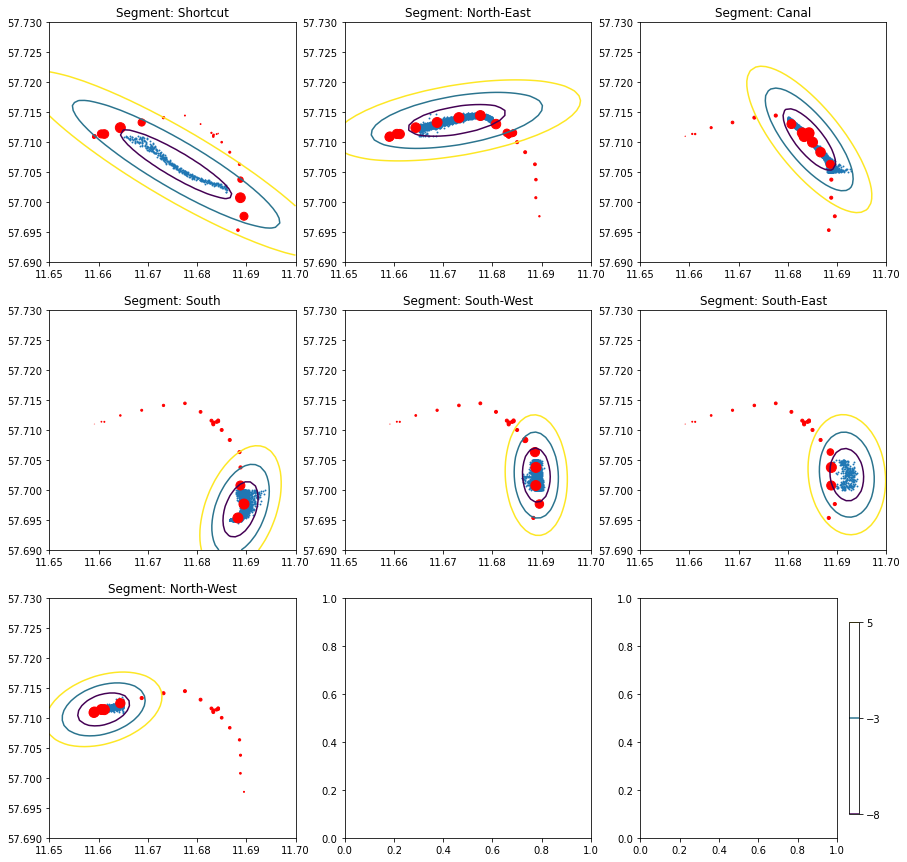

In [44]:
# Draw the data, the Gaussian, and scores for all points from a single voyage
from matplotlib.colors import LogNorm, Normalize

segments=df['segment'].unique()

# ['Shortcut', 'North-East', 'Canal', 'South', 'South-West', 'South-East', 'North-West']

# Create a figure and subplots with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Set the index counter to 0
i =0
# Iterate over each segment
for r in range(3):
    for c in range(3):
        # Get the data for the current segment
        seg = segments[i]
        df_seg= gmm_dfs[seg]
        gmm= gmm_fitted_models[seg]

        x = np.linspace(11.65, 11.70)
        y = np.linspace(57.69, 57.73)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -gmm.score_samples(XX)
        Z = Z.reshape(X.shape)

        # Select the current subplot to plot on
        ax = axs[r][c]

        # Contour shows the Gaussian shape
        CS = ax.contour(X, Y, Z, levels=[-8,-3, 5])

        # This is the original data that we used to fit
        ax.scatter(df_seg['longitude'], df_seg['latitude'], 0.8)

        # Pick one trip, any trip
        one_trip = df[df.RT_id==10]

        # Score every point -- the higher the value, the more likely this point is to belong to this Gaussian
        scores = gmm.score_samples(one_trip[['longitude','latitude']].to_numpy())

        # Draw the points, in red, with the point size corresponding to the log-likelihood
        ax.scatter(one_trip.longitude, one_trip.latitude, s = Normalize()(scores)*10, c = "red")
        ax.scatter(one_trip.longitude, one_trip.latitude, s = LogNorm()(scores)*100, c = "red")

        ax.set_title("Segment: {}".format(seg))
        ax.axis("tight")
        i += 1
        if i==len(segments):
            CB = plt.colorbar(CS, shrink=0.8, extend="both")
            break

# Show the plots
plt.savefig(Output_folder+'/Plot_GaussDists_Segs.png', dpi=500)  
plt.show()


In [45]:
# Score the points for each voyage
path_mapping = {'Shortcut': 0,'North-East': 1,'Canal': 2, 'South':3,  'South-West':4, 
               'South-East':5, 'North-West':6}

# Create a dictionary to store the scores for every point in each segment
scores={}
trip_segs_tag={}
trip_path = {}

segments=df['segment'].unique()

# ['Shortcut' 'North-East' 'Canal' 'South' 'South-West' 'South-East'
#  'North-West']

for rt in df.RT_id.unique().tolist():
# for rt in [0, 5, 1692]:

# Iterate over each segment
    for i, seg in enumerate(segments):
    # Get the data for the current segment
        df_trip=df[df.RT_id==rt]
        df_trip_seg=df_trip[df_trip.segment==seg]
        if df_trip_seg.empty:
            scores[rt, seg]=np.NaN; trip_segs_tag[rt, seg] = 'Not_Pass'
            continue
        gmm= gmm_fitted_models[seg]

        # Score every point -- the higher the value, the more likely this point is to belong to this Gaussian
        scores[rt, seg] = gmm.score_samples(df_trip_seg[['longitude','latitude']].to_numpy())
        if np.nanmean(scores[rt, seg])< 5:
            trip_segs_tag[rt, seg] = 'Not_Pass'
        elif np.nanmean(scores[rt, seg]) > 5:
            trip_segs_tag[rt, seg] = 'Pass'


    # check if 'Not_Pass' exists in trip_segs_tag for keys 'South-East' and 'Shortcut'
    if ((trip_segs_tag[rt, 'South-East'] == 'Not_Pass') & (trip_segs_tag[rt, 'Shortcut'] == 'Not_Pass')):
        trip_path[rt] = 'West_Canal'
    elif ((trip_segs_tag[rt, 'South-East'] == 'Pass') & (trip_segs_tag[rt, 'Shortcut'] == 'Not_Pass')):
        trip_path[rt] = 'East_Canal'
    elif ((trip_segs_tag[rt, 'South-East'] == 'Not_Pass') & (trip_segs_tag[rt, 'Shortcut'] == 'Pass')):
        trip_path[rt] = 'Direct'


# trip_path

In [46]:
df_trip_tag = pd.DataFrame.from_dict(trip_path, orient='index', columns=['Path_class_tag'])
df_trip_tag.index.name = 'RT_id'
df_trip_tag = df_trip_tag.sort_values(by=['RT_id'])

# Path_actual=df.groupby('RT_id')['Path_class'].first()
Path_actual = df.groupby('RT_id')['Path_class'].apply(lambda x: x.mode()[0]).to_frame()

df_result=pd.concat([Path_actual, df_trip_tag], axis=1)
df_result.head(10)

,Path_class,Path_class_tag
RT_id,,
0,West_Canal,West_Canal
1,West_Canal,West_Canal
2,West_Canal,West_Canal
3,West_Canal,West_Canal
4,West_Canal,West_Canal
5,East_Canal,East_Canal
6,East_Canal,East_Canal
7,East_Canal,East_Canal
8,West_Canal,West_Canal


In [47]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(df_result.Path_class, df_result.Path_class_tag)
# print(f'Confusion matrix:\n{conf_mat}')

df_conf_mat = pd.DataFrame(conf_mat, index=['Direct', 'East_Canal', 'West_Canal'], 
                           columns=['Direct', 'East_Canal', 'West_Canal'])
df_conf_mat

,Direct,East_Canal,West_Canal
Direct,62,0,0
East_Canal,0,122,0
West_Canal,0,0,1571


In [48]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

report = classification_report(df_result.Path_class, df_result.Path_class_tag, output_dict=True)

df_report = pd.DataFrame.from_dict(report).transpose().round(3)
df_report

,precision,recall,f1-score,support
Direct,1.0,1.0,1.0,62.0
East_Canal,1.0,1.0,1.0,122.0
West_Canal,1.0,1.0,1.0,1571.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,1755.0
weighted avg,1.0,1.0,1.0,1755.0


### Scatter plots for the results

In [49]:
df_Results = df.copy()  # make a copy of df
df_Results['Path_class_tag'] = df_Results['RT_id'].map(df_result['Path_class_tag'])
df_Results[['RT_id','latitude', 'longitude', 'Path_class', 'Path_class_tag']]

,RT_id,latitude,longitude,Path_class,Path_class_tag
date,,,,,
2020-01-18 05:22:00,1719,57.710913,11.665736,Direct,Direct
2020-01-18 05:23:00,1719,57.709806,11.668781,Direct,Direct
2020-01-18 05:24:00,1719,57.708399,11.671338,Direct,Direct
2020-01-18 05:25:00,1719,57.706959,11.673831,Direct,Direct
2020-01-18 05:26:00,1719,57.705487,11.676338,Direct,Direct
...,...,...,...,...,...
2021-02-27 05:59:00,1753,57.711273,11.660408,Direct,Direct
2021-02-27 06:00:00,1753,57.711388,11.663798,Direct,Direct
2021-03-12 14:49:00,1718,57.710742,11.664951,Direct,Direct


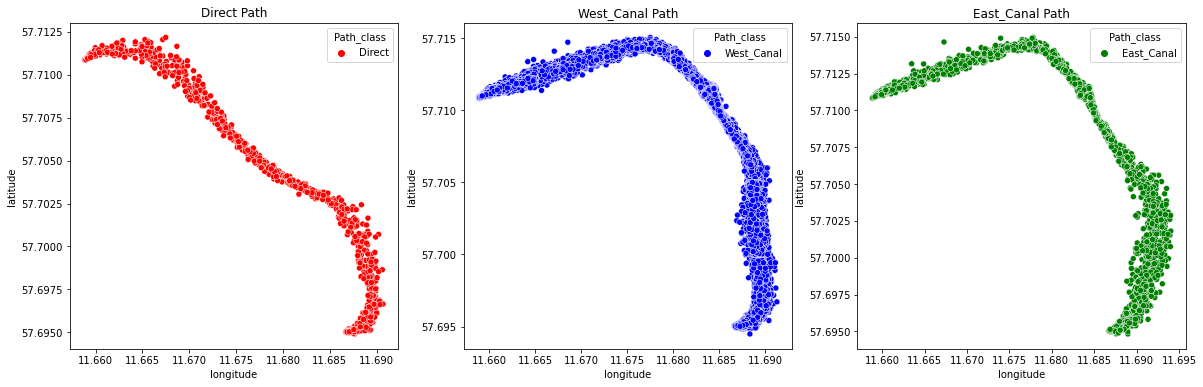

In [50]:
import seaborn as sns

# Visualize the distribution of latitude and longitude for both paths
import matplotlib.ticker as ticker
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.scatterplot(x='longitude', y='latitude', hue='Path_class', data=df[df['Path_class']=='Direct'], ax=axes[0],  palette=['red'])
sns.scatterplot(x='longitude', y='latitude', hue='Path_class', data=df[df['Path_class']=='West_Canal'], ax=axes[1],  palette=['blue'])
sns.scatterplot(x='longitude', y='latitude', hue='Path_class', data=df[df['Path_class']=='East_Canal'], ax=axes[2],  palette=['green'])

# Set number format for axis ticks
for ax in axes:
    ax.ticklabel_format(useOffset=False, style='plain')


axes[0].set_title('Direct Path')
axes[1].set_title('West_Canal Path')
axes[2].set_title('East_Canal Path')

axes[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))


plt.savefig(Output_folder+'/ScatterPlot_result_actual_paths.png', dpi=500)  

plt.show()

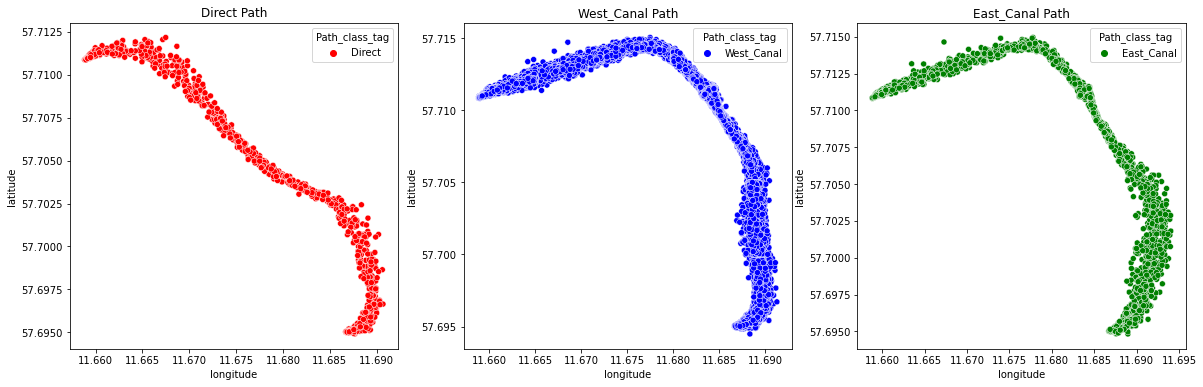

In [51]:
import seaborn as sns

# Visualize the distribution of latitude and longitude for both paths
import matplotlib.ticker as ticker
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
sns.scatterplot(x='longitude', y='latitude', hue='Path_class_tag', data=df_Results[df_Results['Path_class_tag']=='Direct'], ax=axes[0],  palette=['red'])
sns.scatterplot(x='longitude', y='latitude', hue='Path_class_tag', data=df_Results[df_Results['Path_class_tag']=='West_Canal'], ax=axes[1],  palette=['blue'])
sns.scatterplot(x='longitude', y='latitude', hue='Path_class_tag', data=df_Results[df_Results['Path_class_tag']=='East_Canal'], ax=axes[2],  palette=['green'])

# Set number format for axis ticks
for ax in axes:
    ax.ticklabel_format(useOffset=False, style='plain')


axes[0].set_title('Direct Path')
axes[1].set_title('West_Canal Path')
axes[2].set_title('East_Canal Path')

axes[1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))


plt.savefig(Output_folder+'/ScatterPlot_result_clustered_paths.png', dpi=500)  

plt.show()